In [1]:
import tensorflow as tf
from tensorflow.keras import layers
from sklearn import datasets
import pandas as pd
import numpy as np
print(tf.__version__)

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

2.3.1


## Load Data
First get the data.  Sklearn presents the data in a dictionary.  

The target is the price is thousands

Note that X is a dataframe while y is an array!!

In [2]:
cal = datasets.fetch_california_housing()

In [3]:
cal

{'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n--------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 20640\n\n    :Number of Attributes: 8 numeric, predictive attributes and the target\n\n    :Attribute Information:\n        - MedInc        median income in block\n        - HouseAge      median house age in block\n        - AveRooms      average number of rooms\n        - AveBedrms     average number of bedrooms\n        - Population    block population\n        - AveOccup      average house occupancy\n        - Latitude      house block latitude\n        - Longitude     house block longitude\n\n    :Missing Attribute Values: None\n\nThis dataset was obtained from the StatLib repository.\nhttp://lib.stat.cmu.edu/datasets/\n\nThe target variable is the median house value for California districts.\n\nThis dataset was derived from the 1990 U.S. census, using one row per census\nblock group. A block group is the smallest geograp

In [4]:
x = pd.DataFrame(cal['data'])

In [5]:
x.columns = cal['feature_names']

### This is a dataframe

In [6]:
x.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


### This is an array

In [7]:
y = cal['target']

In [8]:
y

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

## Scale Data
Neural Networks are especially sensitive to data scaling.  Nearly all the activation functions saturate at (0,1) or (-1,1).

In [9]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_train = scaler.fit_transform(x)

# Print out the adjustment that the scaler applied to the total_earnings column of data
print("Note: median values were scaled by multiplying by {:.10f} and adding {:.6f}".format(scaler.scale_[7],scaler.min_[7]))
multiplied_by = scaler.scale_[7]
added = scaler.min_[7]

scaled_train_df = pd.DataFrame(scaled_train, columns = x.columns.values)


Note: median values were scaled by multiplying by 0.0996015936 and adding 12.385458


In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

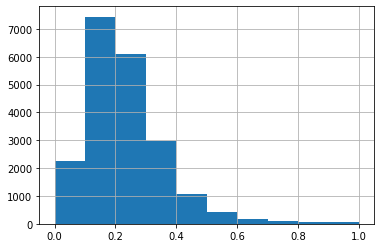

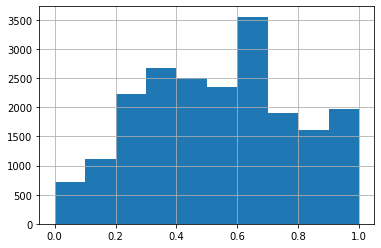

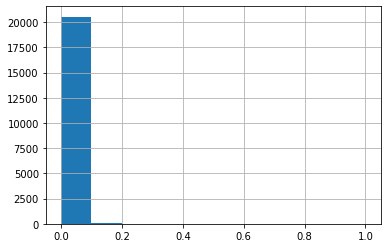

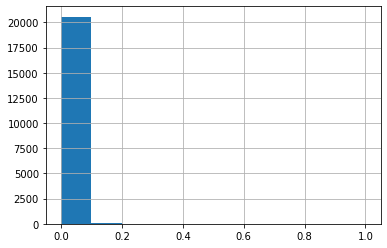

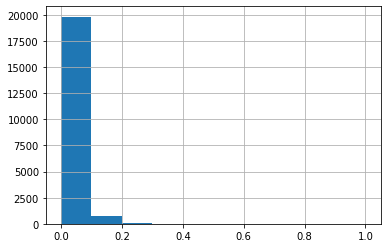

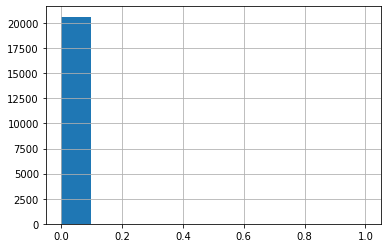

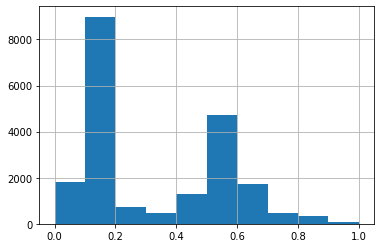

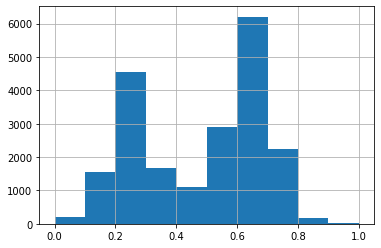

In [11]:
for i in scaled_train_df:
    scaled_train_df[i].hist()
    plt.show()

## Model
Alright, lets get down to business.  We will use the Sequential() class to build a model.  This means we just add layer after layer to the model (in order).

Note that this is NOT the keras package proper.  This is an implementation of the Keras API in TensorFlow.  They are closely related, but this IS TensorFlow (package), not Keras (package).

https://www.tensorflow.org/api_docs/python/tf/keras/Model

In [12]:
x.shape

(20640, 8)

In [13]:
model = tf.keras.Sequential()

model.add(layers.Dense(100, activation='tanh'))
model.add(layers.Dense(50, activation='tanh'))
model.add(layers.Dense(1, activation='linear'))

## Compile Model
The compile step adds an optimizer (solver) and your loss metrics.

In [14]:
model.compile(optimizer='sgd',
             loss = 'mean_squared_error',
             metrics = ['mean_squared_error'])

## Fit Model
Now it is time to train.

In [15]:
model.fit(scaled_train_df.values, y, epochs=10, batch_size=50)

Epoch 1/10
413/413 [==============================] - 0s 623us/step - loss: 0.9140 - mean_squared_error: 0.9140
Epoch 2/10
413/413 [==============================] - 0s 666us/step - loss: 0.5800 - mean_squared_error: 0.5800
Epoch 3/10
413/413 [==============================] - 0s 692us/step - loss: 0.5606 - mean_squared_error: 0.5606
Epoch 4/10
413/413 [==============================] - 0s 722us/step - loss: 0.5517 - mean_squared_error: 0.5517
Epoch 5/10
413/413 [==============================] - 0s 686us/step - loss: 0.5464 - mean_squared_error: 0.5464
Epoch 6/10
413/413 [==============================] - 0s 679us/step - loss: 0.5456 - mean_squared_error: 0.5456
Epoch 7/10
413/413 [==============================] - 0s 677us/step - loss: 0.5438 - mean_squared_error: 0.5438
Epoch 8/10
413/413 [==============================] - 0s 671us/step - loss: 0.5432 - mean_squared_error: 0.5432
Epoch 9/10
413/413 [==============================] - 0s 656us/step - loss: 0.5415 - mean_squared_error:

## Visualize the data
TensorBoard allows you to look at your training curves in real time.  All we need to do here is add a "callback" that is executed every epoch.  TensorBoard writes a summary of the model output.  If you manually build a neural network, you need to add tf.summary operations.

In [16]:
from tensorflow.keras.callbacks import TensorBoard

log_dir = 'logs'
tb = TensorBoard(log_dir=log_dir, histogram_freq=1)

**In your terminal, you'll need to tell TensorBoard where your logs are being stored**

"cd" to the directory containing your log folder then run the following command in the terminal (where "logs" is a folder containing the log files)

Ex. CUS_C02VJ0NQHTDF:~ bblanchard006$ tensorboard --logdir logs

In [17]:
model.compile(optimizer=tf.optimizers.SGD(0.001),
             loss='mean_squared_error',
             metrics=['mean_squared_error'])

In [18]:
model.fit(scaled_train_df.values, y, epochs=5, batch_size=4, callbacks=[tb])

Epoch 1/5
   1/5160 [..............................] - ETA: 0s - loss: 0.0410 - mean_squared_error: 0.0410WARNING:tensorflow:From /anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
5160/5160 [==============================] - 3s 592us/step - loss: 0.5386 - mean_squared_error: 0.5386
Epoch 2/5
5160/5160 [==============================] - 3s 554us/step - loss: 0.5358 - mean_squared_error: 0.5358
Epoch 3/5
5160/5160 [==============================] - 3s 590us/step - loss: 0.5350 - mean_squared_error: 0.53500s - loss: 0.5455 - mean_squared_error:  - ETA: 0s - loss: 0.541
Epoch 4/5
5160/5160 [==============================] - 3s 564us/step - loss: 0.5338 - mean_squared_error: 0.5338
Epoch 5/5
5160/5160 [==============================] - 3s 578us/step - loss: 0.5326 - mean_squared_error: 0.53

## Validate!
SO far we have used the entire dataset to train.  We know that this is not acceptable.  In Neural Networks, rather than a cross validation, a validation split is done.  Lets repeat the experiment with splits.

In [19]:
from time import time
from tensorflow.keras.callbacks import TensorBoard
#tb = TensorBoard(log_dir=f"logs\\{time()}")
tb = TensorBoard(log_dir=f"logs")

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(scaled_train_df, y, test_size=0.20, random_state=101)

In [21]:
model_final = tf.keras.Sequential()

model_final.add(layers.Dense(100, activation='sigmoid'))
model_final.add(layers.Dense(100, activation='sigmoid'))
model_final.add(layers.Dense(1))

In [22]:
model_final.compile(optimizer=tf.optimizers.SGD(0.001),
             loss='mean_squared_error',
             metrics=['mean_squared_error'])

In [23]:
model_final.fit(x_train.values, y_train, validation_data=(x_test.values,y_test), epochs=20, batch_size=5, callbacks=[tb])


Epoch 1/20
3303/3303 [==============================] - 2s 711us/step - loss: 1.3695 - mean_squared_error: 1.3695 - val_loss: 1.3512 - val_mean_squared_error: 1.3512
Epoch 2/20
3303/3303 [==============================] - 2s 690us/step - loss: 1.3296 - mean_squared_error: 1.3296 - val_loss: 1.3446 - val_mean_squared_error: 1.3446
Epoch 3/20
3303/3303 [==============================] - 2s 641us/step - loss: 1.3232 - mean_squared_error: 1.3232 - val_loss: 1.3384 - val_mean_squared_error: 1.3384
Epoch 4/20
3303/3303 [==============================] - 2s 681us/step - loss: 1.3177 - mean_squared_error: 1.3177 - val_loss: 1.3383 - val_mean_squared_error: 1.3383
Epoch 5/20
3303/3303 [==============================] - 2s 640us/step - loss: 1.3103 - mean_squared_error: 1.3103 - val_loss: 1.3267 - val_mean_squared_error: 1.3267
Epoch 6/20
3303/3303 [==============================] - 2s 648us/step - loss: 1.3015 - mean_squared_error: 1.3015 - val_loss: 1.3161 - val_mean_squared_error: 1.3161
Epoc

## Classification?
The only thing we really need to change is the final layer to predict classes.

In [24]:
model_iris = tf.keras.Sequential()

model_iris.add(layers.Dense(100, activation = 'sigmoid'))
model_iris.add(layers.Dense(100, activation = 'sigmoid'))
model_iris.add(layers.Dense(3, activation = 'sigmoid'))

model_iris.compile(optimizer=tf.optimizers.SGD(0.01),
             loss=tf.keras.losses.SparseCategoricalCrossentropy(),
             metrics=['accuracy'])

log_dir = 'iris_logs'
tb_iris = TensorBoard(log_dir=log_dir, histogram_freq=1)

**In your terminal, you'll need to tell tensorboard where your logs are being stored**

Ex. CUS_C02VJ0NQHTDF:~ bblanchard006$ tensorboard --logdir /Users/bblanop/SMU/QTW/iris_logs

In [25]:
iris = datasets.load_iris()

In [26]:
x = iris['data']
y = iris['target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=102)

In [27]:
model_iris.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100, batch_size=4, callbacks=[tb_iris])


Epoch 1/100
30/30 [==============================] - 0s 6ms/step - loss: 1.1319 - accuracy: 0.3250 - val_loss: 1.0977 - val_accuracy: 0.3667
Epoch 2/100
30/30 [==============================] - 0s 1ms/step - loss: 1.1019 - accuracy: 0.3000 - val_loss: 1.0911 - val_accuracy: 0.3667
Epoch 3/100
30/30 [==============================] - 0s 2ms/step - loss: 1.0931 - accuracy: 0.3417 - val_loss: 1.0865 - val_accuracy: 0.6667
Epoch 4/100
30/30 [==============================] - 0s 2ms/step - loss: 1.0948 - accuracy: 0.3583 - val_loss: 1.0880 - val_accuracy: 0.2667
Epoch 5/100
30/30 [==============================] - 0s 1ms/step - loss: 1.0914 - accuracy: 0.3583 - val_loss: 1.0844 - val_accuracy: 0.2667
Epoch 6/100
30/30 [==============================] - 0s 2ms/step - loss: 1.0901 - accuracy: 0.3500 - val_loss: 1.0807 - val_accuracy: 0.3667
Epoch 7/100
30/30 [==============================] - 0s 1ms/step - loss: 1.0896 - accuracy: 0.4167 - val_loss: 1.0839 - val_accuracy: 0.2667
Epoch 8/100
3

Epoch 57/100
30/30 [==============================] - 0s 2ms/step - loss: 0.6460 - accuracy: 0.8417 - val_loss: 0.6056 - val_accuracy: 0.8667
Epoch 58/100
30/30 [==============================] - 0s 1ms/step - loss: 0.6424 - accuracy: 0.7917 - val_loss: 0.6033 - val_accuracy: 0.9667
Epoch 59/100
30/30 [==============================] - 0s 1ms/step - loss: 0.6233 - accuracy: 0.7583 - val_loss: 0.5783 - val_accuracy: 0.8333
Epoch 60/100
30/30 [==============================] - 0s 1ms/step - loss: 0.6216 - accuracy: 0.7667 - val_loss: 0.5844 - val_accuracy: 0.8333
Epoch 61/100
30/30 [==============================] - 0s 1ms/step - loss: 0.6044 - accuracy: 0.8583 - val_loss: 0.5592 - val_accuracy: 0.8333
Epoch 62/100
30/30 [==============================] - 0s 1ms/step - loss: 0.6037 - accuracy: 0.8000 - val_loss: 0.5488 - val_accuracy: 0.8333
Epoch 63/100
30/30 [==============================] - 0s 1ms/step - loss: 0.5892 - accuracy: 0.8250 - val_loss: 0.5514 - val_accuracy: 0.9667
Epoch 

In [28]:
predictions = model_iris.predict(x_test)

In [29]:
print("Prediction: {}".format(tf.argmax(predictions, axis=1)))
print("   Actuals: {}".format(y_test))

Prediction: [0 2 1 1 2 0 0 0 1 1 2 1 0 1 2 0 0 2 0 2 0 2 1 1 0 1 2 2 2 0]
   Actuals: [0 2 1 1 2 0 0 0 1 1 2 1 0 2 2 0 0 2 0 2 0 2 1 1 0 1 2 2 2 0]


In [30]:
predictions

array([[0.15268323, 0.01605314, 0.00056964],
       [0.00065544, 0.03740159, 0.05825314],
       [0.00294375, 0.02920729, 0.016716  ],
       [0.00412109, 0.02833849, 0.01279739],
       [0.00040054, 0.03892139, 0.08463848],
       [0.15843806, 0.01572806, 0.0005441 ],
       [0.1684776 , 0.01544896, 0.00051197],
       [0.2171303 , 0.01450896, 0.00039187],
       [0.01075253, 0.02467954, 0.00575793],
       [0.00200462, 0.03105855, 0.0230554 ],
       [0.00085267, 0.03621599, 0.04701644],
       [0.00165588, 0.03194469, 0.02697784],
       [0.15081757, 0.01586628, 0.00057203],
       [0.00138146, 0.03330326, 0.03167364],
       [0.00032416, 0.04090399, 0.10019124],
       [0.18650287, 0.01480755, 0.00045583],
       [0.19745398, 0.01513475, 0.00043845],
       [0.00050586, 0.03840998, 0.07087377],
       [0.22044292, 0.01463145, 0.00038821],
       [0.00083938, 0.03637087, 0.04792088],
       [0.19807473, 0.01479855, 0.00043145],
       [0.00089586, 0.0353978 , 0.04492012],
       [0.

In [31]:
test_accuracy = tf.keras.metrics.Accuracy()


In [32]:
test_accuracy(tf.argmax(predictions, axis=1), y_test)
print("Test set accuracy: {:.3%}".format(test_accuracy.result()))

Test set accuracy: 96.667%


In [33]:
%load_ext tensorboard
%tensorboard --logdir iris_logs

## Case Study 12

In [34]:
df = pd.read_csv('HIGGS.csv', header=None)

In [35]:
# Verify size is as expected
print("{:>25}{:>10,} x {:,}\n".format("Shape of raw data is ", df.shape[0], df.shape[1]))

    Shape of raw data is 11,000,000 x 29



In [36]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,1.0,0.869293,-0.635082,0.225690,0.327470,-0.689993,0.754202,-0.248573,-1.092064,0.000000,...,-0.010455,-0.045767,3.101961,1.353760,0.979563,0.978076,0.920005,0.721657,0.988751,0.876678
1,1.0,0.907542,0.329147,0.359412,1.497970,-0.313010,1.095531,-0.557525,-1.588230,2.173076,...,-1.138930,-0.000819,0.000000,0.302220,0.833048,0.985700,0.978098,0.779732,0.992356,0.798343
2,1.0,0.798835,1.470639,-1.635975,0.453773,0.425629,1.104875,1.282322,1.381664,0.000000,...,1.128848,0.900461,0.000000,0.909753,1.108330,0.985692,0.951331,0.803252,0.865924,0.780118
3,0.0,1.344385,-0.876626,0.935913,1.992050,0.882454,1.786066,-1.646778,-0.942383,0.000000,...,-0.678379,-1.360356,0.000000,0.946652,1.028704,0.998656,0.728281,0.869200,1.026736,0.957904
4,1.0,1.105009,0.321356,1.522401,0.882808,-1.205349,0.681466,-1.070464,-0.921871,0.000000,...,-0.373566,0.113041,0.000000,0.755856,1.361057,0.986610,0.838085,1.133295,0.872245,0.808487


In [37]:
df[0].describe()

count    1.100000e+07
mean     5.299203e-01
std      4.991040e-01
min      0.000000e+00
25%      0.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      1.000000e+00
Name: 0, dtype: float64